1. Construir un programa que permita calcular una interpolación lineal, para ello debera realizar lo siguiente:

    a. Deducir el método de interpolación lineal y encontrar la ecuación general de recurrencia que permite interpolar.

    b. Aplicar el método para dos puntos.

    c. Generalizar el método para N de puntos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable


In [2]:
def pendiente(x,y):
    return (
        (y[0] - y[1]) /
        (x[0] - x[1])
    )

def punt_pend(x0, y0, m):
    return lambda x : m*(x - x0) + y0

def inter_bin(x, y):
    m = pendiente(x, y)
    return punt_pend(x[0], y[0], m)

def inter_lin(var,x,y):

    if isinstance(var, Iterable):
        return [inter_lin(xi, x, y) for xi in var]

    if (var > max(x)) or (var < min(x)):
        return f'interpolaci`on no definida en {var}'

    x, y = pointsort(x, y)
    i=0

    while var > x[i]:
        i+=1
    return inter_bin([x[i], x[i - 1]], [y[i], y[i - 1]])(var)


def pointsort(x, y):
    n = len(x)

    points = sorted([[x[i],y[i]] for i in range(n)])
    sortedx = [points[i][0] for i in range(n)]
    sortedy = [points[i][1] for i in range(n)]
    return sortedx, sortedy

def points_to_list(p):
    n = len(p)
    return [p[i][0] for i in range(n)], [p[i][1] for i in range(n)]

In [3]:
p=[[w,np.sin(w)] for w in np.linspace(0,2*np.pi,11)]

x, y = points_to_list(p)

interpol = lambda var : inter_lin(var, x, y)

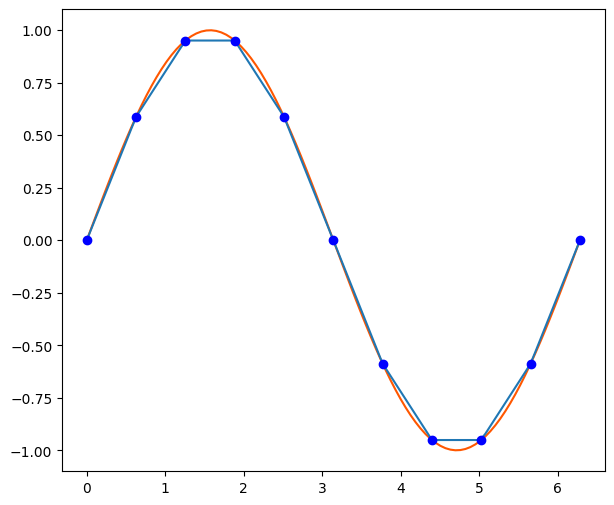

In [4]:
xax = np.linspace(min(x),max(x),100)

plt.figure(figsize = (7,6))

plt.plot(np.linspace(0,2*np.pi,100),np.sin(np.linspace(0,2*np.pi,100)), color = '#ff5700')
plt.plot(xax, interpol(xax))
plt.plot(x, y,'bo')

plt.show()

2. Determinar la interpolacion lineal que pasa por los puntos(2, 4), y (5, 1). Escribir la solución en código markdown.

In [5]:
print(pendiente([2,5],[4,1]),)

-1.0


Disenar un programa general, que realice la interpolación de lagrange según lo visto en clase.

Realizar interpolación lagrange

Consideremos la función: \begin{equation*} f(x) = \frac{1}{1+25x^2} \end{equation*} en el intervalo $[-1,1]$, definamos un conjunto de puntos $n+1$
 equiespaciados en $[-1,1]$
.

1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=4,8,12,16,20$
.


In [6]:
#calculamos la base polinomica de lagrange.
#encontramos el n-esimo termino de la productoria

#given an iterable a_j, prod(a_j) returns the product of its items.
def prod(a_j):
    ret = 1
    for i in a_j:
        ret=ret*i
    return ret

x_=[-1.5,-0.75,0,0.75,1.5]
y_=[-14.1014, -0.931596, 0, 0.931596, 14.1014]

#l_(j, x_) is the j-esima lagrange base for the x_ set of x coordenates of the points for interpolation.
def l_(j, x_):

    ai= lambda x, i, j : (
        (x - x_[i])/
        (x_[j] - x_[i])
    )

    k = len(x_)
    a_ = lambda j, x : [ai(x, i, j) for i in range(j)]+[ai(x, i, j) for i in range(j+1,k)]

    return lambda x : prod(a_(j, x))

#L is the lagrange interpolation.
def L(x_,y_):
    return lambda x : sum([y_[j]*l_(j, x_)(x) for j in range(len(x_))])


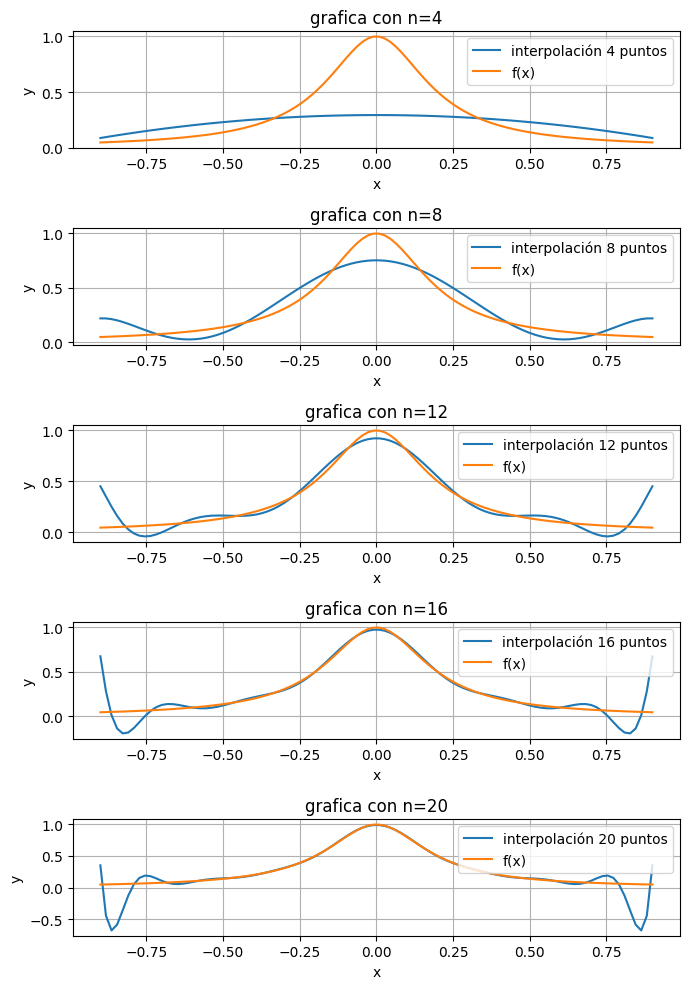

In [7]:
f = lambda x : (
    1/
    (1+25*x**2)
)

n_ = [4,8,12,16,20]
x_ = [np.linspace(-1,1,ni) for ni in n_]
p_inter = [[x_n,f(x_n)] for x_n in x_]

x_graph = np.linspace(-0.9,0.9,100)
y_graph = lambda f : f(x_graph)

inter_ = [L(x_n,y_n) for x_n, y_n in p_inter]


m, n = 5, 2
fig, ax = plt.subplots(m,1,layout='tight', figsize=(7,10))

for i in range(m):
    ax[i].set_title('grafica con n={}'.format(n_[i]))
    ax[i].plot(x_graph, y_graph(inter_[i]))
    ax[i].plot(x_graph, y_graph(f))
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].legend(['interpolación {} puntos'.format(n_[i]),'f(x)'], loc = 'upper right')

for i in range(m):
    for j in range(n):
        ax[i].grid(True)


2. Comprobar gráficamente cómo el error aumenta con $n$
. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

Para este numeral, emplee que:

La cota del error , viene dado por: \begin{equation} f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n) \end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [38]:
import sympy as sp
from scipy.optimize import minimize_scalar
from scipy.special import factorial as fct

Dado que no tenemos informacion sobre el valor de $\xi$, antes de utilizar la expresion sugerida, acotaremos primero el error usando la siguiente expresión sacada de [wikipedia](https://en.wikipedia.org/wiki/Lagrange_polynomial#Remainder_in_Lagrange_interpolation_formula):
$$
|f(x)-p(x)| \le \frac{(x_n-x_0)^{n+1}}{(n+1)!}\max_{x_0 \le \xi \le x_n} |f^{(n+1)}(\xi)|
$$



In [42]:
x = sp.symbols('x')
n = sp.Integer(4)
phi = sp.symbols('\phi') #sympy no reconoce el simbolo \xi asi que usamos \phi provisionalmente

f = 1/(1+25*phi**2)
fp = sp.diff(f, phi, n+1) #fp es la 5ta derivada de f

In [93]:

listax = list(np.linspace(-1,1,n))
listax_symbol = [-1+i*sp.Rational(2/(n-1)) for i in range(n)]

# Encontramos primero el maximo de la 5ta derivada de f utilizando la funicion minimize_scalar de la libreria  scipy.optimize

lamb_fp = sp.lambdify(phi, fp)
#dado que encontraremos un maximo y la funcion encuentra un  minimo, ponemos un negativo al principio de la funcion.
maxf = minimize_scalar(lambda x: -abs(lamb_fp(x)), bounds = (min(listax),max(listax)))['x']

# Ahora encontraremos el resto de la expresion para acotar el error

error = (
    ((listax[-1]-listax[0])**(n+1))/
    sp.factorial(int(n)+1)
)*abs(lamb_fp(maxf))

print('el error de la interpolacion es menor que {}'.format(error))

el error de la interpolacion es menor que 7972.93515193096


In [66]:
#ahora utilizaremos el maximo de la 5-ta derivada de f para encontrar el error en x = 0.5

productoria_error = 1
for i in range(n):
    productoria_error*=(x-listax_symbol[i])
error_2 = (
    (1/
    sp.factorial(n+1))
    *
    productoria_error
    *
    lamb_fp(minimize_scalar(lambda x: -lamb_fp(x), bounds = (min(listax),max(listax)))['x'])
)

error_2

558.010154896912*(x - 1)*(x - 1/3)*(x + 1/3)*(x + 1)

In [68]:
#Evaluando el error en x = 0.5 tenemos
error_2.subs(x,0.5)

-58.1260578017617